In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from sklearn.metrics import confusion_matrix 
import seaborn as sns

## Loading The MNIST dataset
MNIST contains 60,000 training samples and 10,000 test samples

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

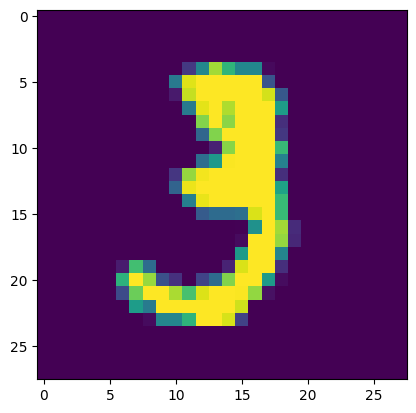

In [6]:
plt.imshow (X_train[10])

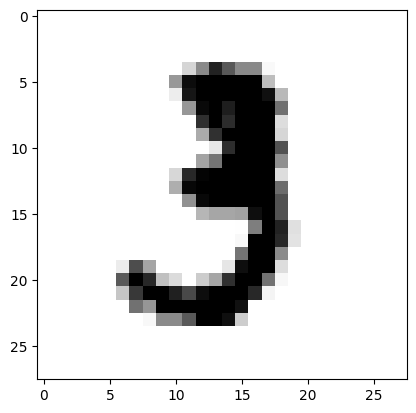

In [7]:
plt.imshow ( X_train[10], cmap = plt.cm.binary )

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Normalisation

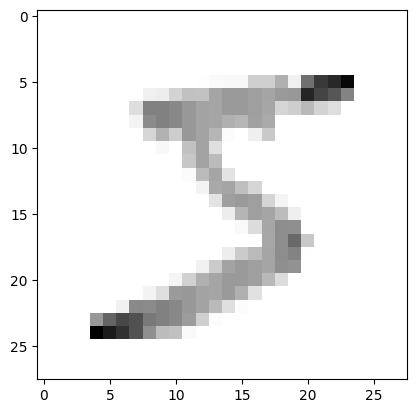

In [9]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

## Resizing to make it suitable for applying convolution 

In [10]:
IMG_SIZE = 28
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Creating Deep learning architecture 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Activation, Conv2D
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model = Sequential()

model.add(Conv2D (6, (5,5), input_shape = X_train.shape[1:]))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D (16, (5,5)))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D (64, (3,3)))
# model.add(Activation ('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

# model.add(Dense(32))
# model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

C:\Users\shuddhabrota\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 24, 24, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation

In [14]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics =['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

## Training

In [16]:
model.fit(X_train, y_train,epochs = 10, validation_split = 0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8061 - loss: 0.6181 - val_accuracy: 0.9623 - val_loss: 0.1225
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9700 - loss: 0.0959 - val_accuracy: 0.9737 - val_loss: 0.0840
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0634 - val_accuracy: 0.9745 - val_loss: 0.0812
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9787 - val_loss: 0.0670
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9799 - val_loss: 0.0696
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9836 - val_loss: 0.0563
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9804 - val_loss: 0.0724
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0194 - 

## Testing on test dataset

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("The testing loss of the model is ", test_loss)
print("The testing accuracy of the model is ",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.0579
The testing loss of the model is  0.049723733216524124
The testing accuracy of the model is  98.79000186920166


In [18]:
predictions = model.predict([X_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Forming and array of predicted Values

In [19]:
y_predict = np.zeros(len(y_test))
for i in range (len(y_test)):
    y_predict[i] = np.argmax(predictions[i])

print(y_predict)
    

[7. 2. 1. ... 4. 5. 6.]


## Forming the confusion matrix

<Axes: >

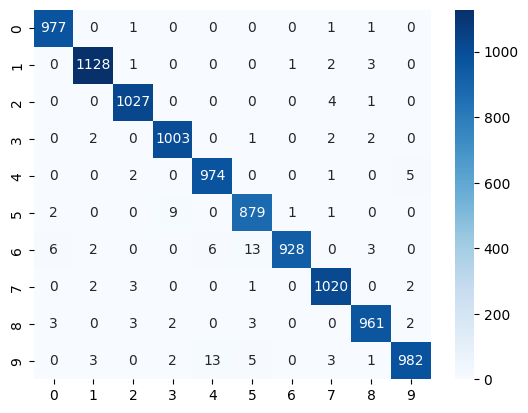

In [20]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

The image is shown below : 


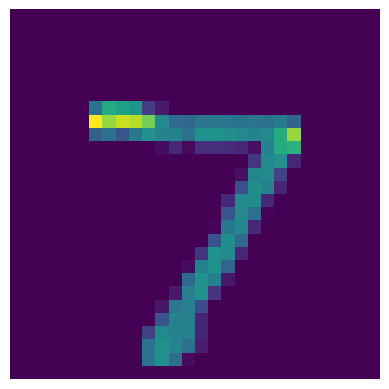

The real number is  7
The predicted number is  7
The image is shown below : 


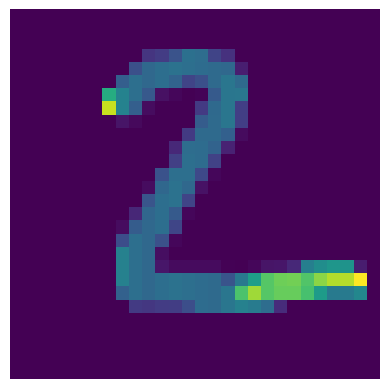

The real number is  2
The predicted number is  2
The image is shown below : 


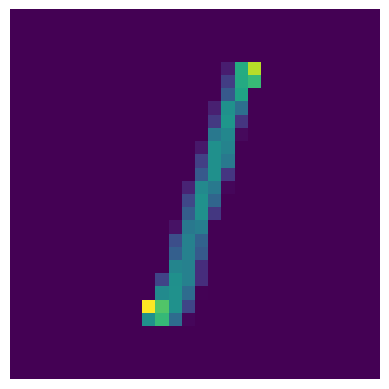

The real number is  1
The predicted number is  1
The image is shown below : 


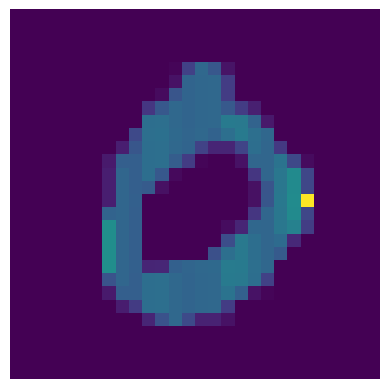

The real number is  0
The predicted number is  0
The image is shown below : 


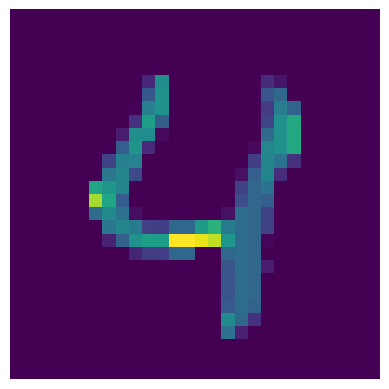

The real number is  4
The predicted number is  4
The image is shown below : 


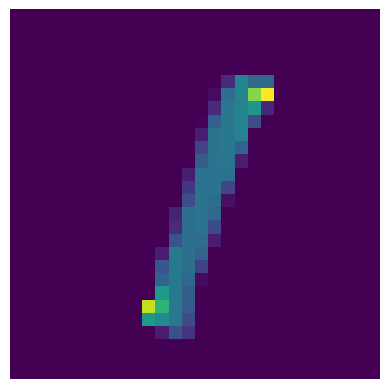

The real number is  1
The predicted number is  1
The image is shown below : 


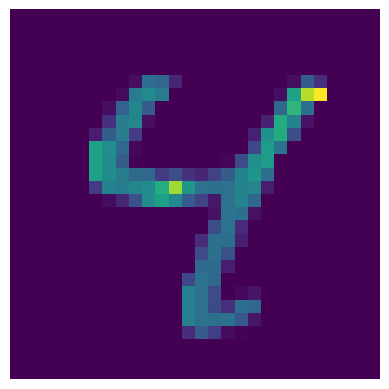

The real number is  4
The predicted number is  4
The image is shown below : 


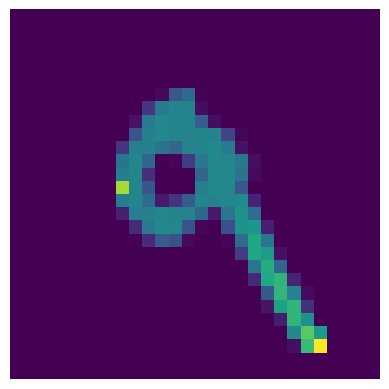

The real number is  9
The predicted number is  9
The image is shown below : 


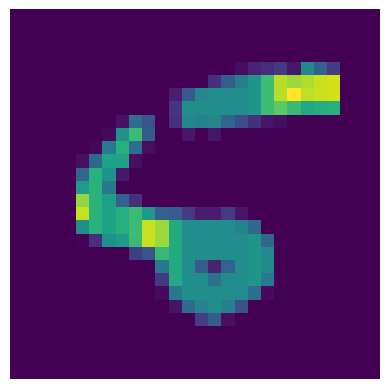

The real number is  5
The predicted number is  5
The image is shown below : 


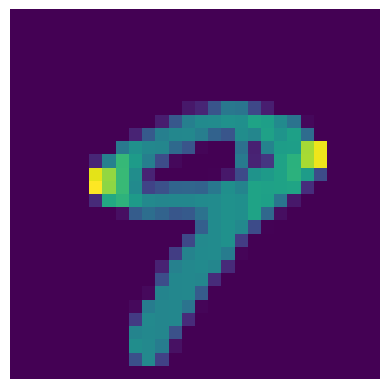

The real number is  9
The predicted number is  9
The image is shown below : 


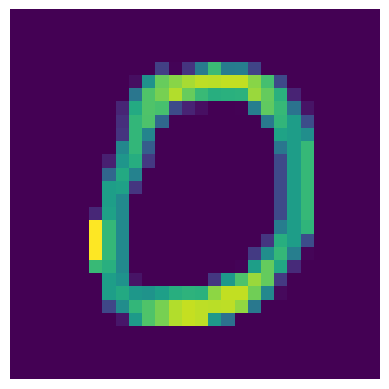

The real number is  0
The predicted number is  0
The image is shown below : 


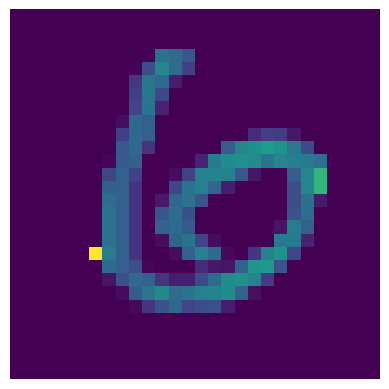

The real number is  6
The predicted number is  6
The image is shown below : 


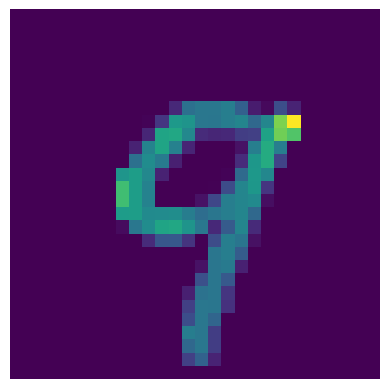

The real number is  9
The predicted number is  9
The image is shown below : 


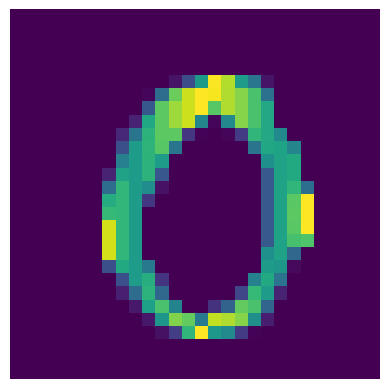

The real number is  0
The predicted number is  0
The image is shown below : 


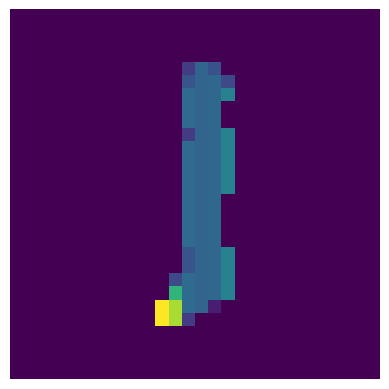

The real number is  1
The predicted number is  1


In [21]:
for i in range (15):
    print("The image is shown below : ")
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.show()
    plt.pause(1)
    print("The real number is ", y_test[i])
    print("The predicted number is ",np.argmax(predictions[i]))
    
    

## Processing our image

Shape of real image  (384, 308, 3)


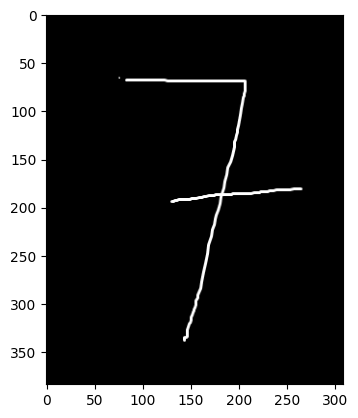

In [65]:
img = cv2.imread('digit.png') #enter filename
plt.imshow(img)
print("Shape of real image ", img.shape)


In [66]:
# changing to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Shape of gray scale image ", gray.shape)
subject = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
print("Shape of resized image ", subject.shape)
newimg = tf.keras.utils.normalize(subject, axis = 1)
final = np.array(newimg).reshape(1, IMG_SIZE, IMG_SIZE, 1) 


Shape of gray scale image  (384, 308)
Shape of resized image  (28, 28)


## Predicting user given image

In [67]:
prediction = model.predict(final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [68]:
np.argmax(prediction)

1